## Setting Up

In [142]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

import os
print(os.listdir("../input"))

training_file = "../input/titanic/train.csv"
testing_file = "../input/titanic/test.csv"
control_file = "../input/titanic/gender_submission.csv"

training_data = pd.read_csv(training_file)
testing_data = pd.read_csv(testing_file)

['titanic']


## Question 1.1

In [143]:
def data_drop(df,x):
    df=df.drop("Ticket", axis=1)
    df=df.drop("Name", axis=1)
    if x == 0:
        df=df.drop("PassengerId", axis=1)
    #df=df.drop("Fare", axis=1)
    df=df.drop("Cabin", axis=1)
    #df=df.drop("Age", axis=1)
    return df

control_testing = data_drop(testing_data, 1)
training_data = data_drop(training_data,0)
testing_data = data_drop(testing_data,0)

def data_check(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df = df.dropna(axis=0)
    df = df.reset_index()
    df = df.drop("index", axis=1)
    return df
training_data = data_check(training_data)
testing_data = data_check(testing_data)

def alpha_to_num(df):
    df['Sex'].mask(df['Sex'] == 'male', 0, inplace=True)
    df['Sex'].mask(df['Sex'] == 'female', 1, inplace=True)
    df['Embarked'].mask(df['Embarked'] == 'S', 0, inplace=True)
    df['Embarked'].mask(df['Embarked'] == 'C', 1, inplace=True)
    df['Embarked'].mask(df['Embarked'] == 'Q', 2, inplace=True)
    
    df['Embarked'] = df['Embarked'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    return df
control_testing = alpha_to_num(control_testing)
training_data = alpha_to_num(training_data)
print(training_data)
print(testing_data)

x = training_data[['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']].to_numpy()
y = training_data[['Survived']].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state = 42)

     Survived  Pclass Sex        Age  SibSp  Parch     Fare Embarked
0           0       3   0  22.000000      1      0   7.2500        0
1           1       1   1  38.000000      1      0  71.2833        1
2           1       3   1  26.000000      0      0   7.9250        0
3           1       1   1  35.000000      1      0  53.1000        0
4           0       3   0  35.000000      0      0   8.0500        0
..        ...     ...  ..        ...    ...    ...      ...      ...
884         0       2   0  27.000000      0      0  13.0000        0
885         1       1   1  19.000000      0      0  30.0000        0
886         0       3   1  29.699118      1      2  23.4500        0
887         1       1   0  26.000000      0      0  30.0000        1
888         0       3   0  32.000000      0      0   7.7500        2

[889 rows x 8 columns]
     Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0         3    male  34.50000      0      0    7.8292        Q
1         3  female  4

## Question 1.2

[Text(0.5416666666666666, 0.9, 'X[1] <= 0.5\ngini = 0.475\nsamples = 755\nvalue = [462, 293]'),
 Text(0.3333333333333333, 0.7, 'X[5] <= 26.269\ngini = 0.317\nsamples = 491\nvalue = [394, 97]'),
 Text(0.16666666666666666, 0.5, 'X[2] <= 13.5\ngini = 0.233\nsamples = 349\nvalue = [302, 47]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.25, 0.3, 'gini = 0.191\nsamples = 336\nvalue = [300, 36]'),
 Text(0.5, 0.5, 'X[3] <= 2.5\ngini = 0.456\nsamples = 142\nvalue = [92, 50]'),
 Text(0.4166666666666667, 0.3, 'X[2] <= 13.5\ngini = 0.483\nsamples = 120\nvalue = [71, 49]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5, 0.1, 'gini = 0.467\nsamples = 113\nvalue = [71, 42]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.75, 0.7, 'X[0] <= 2.5\ngini = 0.382\nsamples = 264\nvalue = [68, 196]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.094\nsamples = 141\nvalue = [7, 134]'),
 Text(

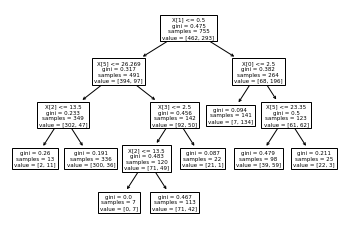

In [144]:
dt = tree.DecisionTreeClassifier(max_depth = 5, min_impurity_decrease = 0.005)
dt.fit(X_train, y_train)
tree.plot_tree(dt)

## Question 1.3

In [145]:
from sklearn.model_selection import cross_val_score
dt_result = cross_val_score(dt, X_train, y_train, cv=5, scoring = "accuracy")
print(dt.score(X_test, y_test))
print(dt_result.mean())

0.8432835820895522
0.8013245033112583


## Question 1.4

In [146]:
rf = RandomForestClassifier(n_estimators=101, max_depth = 5, min_impurity_decrease = 0.005, bootstrap=False, random_state=0)
rf.fit(X_train, y_train)
rf_result = cross_val_score(rf, X_train, y_train, cv=5, scoring = "accuracy")
print(rf.score(X_test, y_test))
print(rf_result.mean())

0.8283582089552238
0.8092715231788079


## Question 1.5